### Prepare catalogs for cutouts.
This notebook is for generating cutout images for LSBGs matched with MW-like hosts. We currently focus on two redshift bins: 0.01-0.02 and 0.02-0.04. 

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import kuaizi as kz
from astropy.table import Table, vstack
import astropy.units as u

from kuaizi.display import display_single
from astropy.io import fits

In [5]:
kz.utils.set_env(project='HSC', name='LSBG', data_dir='/scratch/gpfs/jiaxuanl/Data/')

'/scratch/gpfs/jiaxuanl/Data/HSC/LSBG'

In [20]:
lsbg_cat = Table.read('./Catalog/NSA/lsbg_NSA_MW_match.fits')
print('Total LSBGs:', len(lsbg_cat))
flag = (lsbg_cat['host_z'] <= 0.04) & (lsbg_cat['host_z'] >= 0.02)
lsbg_cat = lsbg_cat[flag]
print('# of LSBGs:', len(lsbg_cat))
lsbg_cat.write('./Catalog/NSA/z002_004/lsbg_NSA_MW_z002_004.fits', overwrite=True)

Total LSBGs: 86002
# of LSBGs: 5576


In [21]:
lsbg_cat = Table.read('./Catalog/NSA/lsbg_NSA_MW_match.fits')
print('Total LSBGs:', len(lsbg_cat))
flag = (lsbg_cat['host_z'] <= 0.02) & (lsbg_cat['host_z'] >= 0.01)
lsbg_cat = lsbg_cat[flag]
print('# of LSBGs:', len(lsbg_cat))
lsbg_cat.write('./Catalog/NSA/z001_002/lsbg_NSA_MW_z001_002.fits', overwrite=True)

Total LSBGs: 86002
# of LSBGs: 2791


In [26]:
lsbg_cat[0]['ra']

148.644722

In [27]:
Table.read('./Catalog/NSA/z001_002/nsa_cutout_cat_z001_002.fits')

ra_1,dec_1,a_image,b_image,theta_image,ellipticity,mag_auto_g,mag_auto_r,mag_auto_i,flux_radius_ave_g,flux_radius_ave_i,mu_ave_g,mu_ave_i,acorr_ratio,g-i,g-r,A_g,A_r,A_i,tract,patch,synth_id,viz-id,is_candy,is_galaxy,is_tidal,is_outskirts,is_cirrus,is_junk,num_votes,good_votes,bad_votes,host_name,host_z,host_ang_diam_dist,host_stellar_mass,host_halo_mass,host_r_vir,host_r_vir_ang,host_300kpc_ang,host_nvotes,host_spiral,host_elliptical,host_uncertain,host_RA,host_DEC,cutout_size,prefix,ra_2,dec_2,radius
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,,,,,,,,,,,,,,arcmin
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,bytes3,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,bytes19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes66,float64,float64,float64
148.644722,0.6324236,26.481,19.073,-29.64,0.28,17.8636,17.4643,17.2559,5.299812,5.179692,22.965983582252385,22.334202242303963,1.0666763135780277,0.5990814941543471,0.4005263876679588,0.091888629160825,0.06511501682878135,0.04647012331517132,9569,"1,3",-1,29,2,0,0,0,0,0,2,2,0,J095320.22+004151.8,0.012554815039038658,54.714014475531776,10.752464621791468,12.382583618164062,351.1550435804657,0.3677248170364548,0.31415594657593937,66.0,1.0,0.0,0.0,148.3342549085445,0.6976978629829147,1.0,/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Cutout/NSA/z001_002/nsa_29,148.644722,0.6324236,1.0
30.6411865,-5.4208379,5.668,4.748,-70.15,0.162,23.5773,23.0723,23.05,2.5482240000000003,2.1488880000000004,26.92808632341621,26.27463419035521,1.6249965069592989,0.5496779663821286,0.5456349463904673,0.074698957876451,0.05293390426691903,0.03777692425858255,8521,"7,3",-1,43,2,0,0,1,0,0,3,2,1,J020121.49-052219.9,0.017789000645279884,77.0315676422389,10.972699492702112,12.893357276916504,518.0964037442687,0.38535808639757846,0.2231388310819797,nan,nan,nan,nan,30.340051418028484,-5.370902302608455,1.0,/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Cutout/NSA/z001_002/nsa_43,30.6411865,-5.4208379,1.0
140.8198114,2.0691864,10.544,5.124,62.6,0.514,22.0173,21.3246,21.2354,2.887416,3.8090640000000002,25.55167748736025,25.225512041216582,1.4917182105111195,0.5945250268581581,0.5098150033168867,0.12315944190711851,0.0872744452240051,0.06228446876527645,9807,"7,3",-1,49,0,0,0,0,0,2,2,0,2,J092336.19+020813.0,0.01691265217959881,73.31488765931118,10.756346076259241,12.393817901611328,353.28309055437614,0.27609168681102775,0.2344508080285824,27.0,1.0,0.0,0.0,140.90209285723307,2.1364878170321813,1.0,/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Cutout/NSA/z001_002/nsa_49,140.8198114,2.0691864,1.0
345.5167346,2.2063418,11.774,8.612,-57.13,0.269,20.8373,19.8149,19.414,2.4748080000000003,1.9799640000000003,24.107183165139027,22.26925349694107,1.2194126703078205,1.3496326844563633,0.9817483033528749,0.22875258520186648,0.16210088855474053,0.11568526965822817,9944,"2,4",-1,120,1,1,0,0,0,0,2,2,0,J230142.90+021548.9,0.010647382587194443,46.50968570644832,10.305697768458948,11.776466369628906,220.77522584559384,0.2719753723273668,0.3695732226553101,nan,nan,nan,nan,345.4286664848169,2.2636530794913856,1.0,/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Cutout/NSA/z001_002/nsa_120,345.5167346,2.2063418,1.0
223.6637535,43.9890614,19.809,10.672,-60.07,0.461,18.8501,18.4248,18.1278,3.6796200000000003,3.394188,23.05989897669728,22.156143598069637,1.1780269037252458,0.723296751469487,0.43076817264346534,0.0673775985601727,0.047745771203636135,0.03407435002965739,15999,"4,5",-1,136,0,2,0,0,0,0,2,2,0,J145509.05+434906.8,0.01857396401464939,80.35391785752009,10.55821832967721,12.060482025146484,273.2647341911828,0.1948494476885082,0.21391283613514508,66.0,1.0,0.0,0.0,223.78776865877816,43.818586488016564,1.0,/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Cutout/NSA/z001_002/nsa_136,223.6637535,43.9890614,1.0
132.81308,-2.1314523,18.227,11.242,27.87,0.383,20.8189,20.1771,20.1253,12.427548000000002,

#### Add cutout size to the catalogs

In [18]:
cat = Table.read('./Catalog/NSA/z001_002/lsbg_NSA_MW_z001_002.fits')
## Adaptive cutout size??  
# Normal objects, use 1.0 arcmin cutout.
# Radius > 20 arcsec, use 1.5 arcmin cutout.
# Radius > 30 arcsec, use 2.0 arcmin cutout.
size = np.ones(len(cat)) * 1.0 * u.arcmin

size[cat['flux_radius_ave_i'] > 20] = 1.5 * u.arcmin # shoud be larger
size[cat['flux_radius_ave_i'] > 30] = 2 * u.arcmin # should be larger 

cat['cutout_size'] = size.value
cat.write('./Catalog/NSA/z001_002/lsbg_NSA_MW_z001_002.fits', overwrite=True)

In [19]:
cat = Table.read('./Catalog/NSA/z002_004/lsbg_NSA_MW_z002_004.fits')
## Adaptive cutout size??  
# Normal objects, use 1.0 arcmin cutout.
# Radius > 20 arcsec, use 1.5 arcmin cutout.
# Radius > 30 arcsec, use 2.0 arcmin cutout.
size = np.ones(len(cat)) * 1.0 * u.arcmin

size[cat['flux_radius_ave_i'] > 20] = 1.5 * u.arcmin # shoud be larger
size[cat['flux_radius_ave_i'] > 30] = 2 * u.arcmin # should be larger 

cat['cutout_size'] = size.value
cat.write('./Catalog/NSA/z002_004/lsbg_NSA_MW_z002_004.fits', overwrite=True)

Generate cutout


Run `'/home/jiaxuanl/Research/Packages/kuaizi/diezi/gen_cutout/nsa_sample/lsbg_cutout_nsa.sh'`

In the end, we get `$gpfs/Data/HSC/LSBG/Cutout/nsa_xxxx_cutout_cat.fits`

In [33]:
cat = Table.read('./Catalog/NSA/z001_002/lsbg_NSA_MW_z001_002.fits')
cat = vstack([cat, Table.read('./Catalog/NSA/z002_004/lsbg_NSA_MW_z002_004.fits')])

In [39]:
flag = ((cat['ra'] < 75) | (cat['ra'] > 315)) & (cat['dec'] < 30)

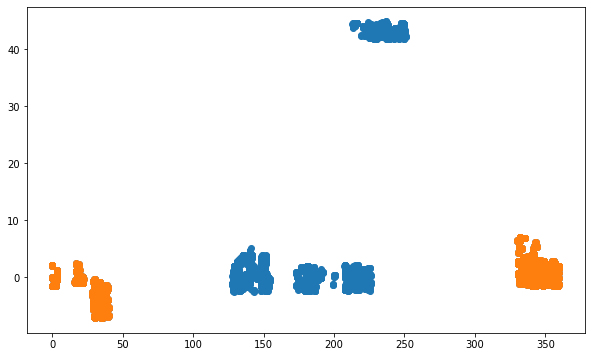

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(cat['ra'], cat['dec'])

plt.scatter(cat[flag]['ra'], cat[flag]['dec'])

In [41]:
np.sum(flag)

3547

In [42]:
3547 / 5500 * 200

128.98181818181817